### Data Dictionary
|  Column | Description  |
|---|---|
| CLIENTNUM   | Client number. Unique identifier for the customer holding the account  |
| Attrition_Flag  | Internal event (customer activity) variable - if the account is closed then 1 else 0  |
| Customer_Age  | 	Demographic variable - Customer's Age in Years  |
| Gender  | Demographic variable - M=Male, F=Female
  |
| Dependent_count  | 	Demographic variable - Number of dependents  |
| Education_Level  | Demographic variable - Educational Qualification of the account holder (example: high school, college graduate, etc.)  |
| Marital_Status  | Demographic variable - Married, Single, Divorced, Unknown  |
| Income_Category  | Demographic variable - Annual Income Category of the account holder ($<\$40\text{K}$, $\$40\text{K - }60\text{K}$, $\$60\text{K - }80\text{K}$, $\$80{K - }\$120\text{K}$, $>$  |
| Card_Category  | Product Variable - Type of Card (Blue, Silver, Gold, Platinum)  |
| Monthsonbook  | Period of relationship with bank
  |
| TotalRelationshipcount  | Total no. of products held by the customer
  |
| MonthsInactive12_mon  | No. of months inactive in the last 12 months
  |
| ContactsCount12_mon  | No. of Contacts in the last 12 months
  |
| Credit_Limit  | Credit Limit on the Credit Card
  |
| TotalRevolvingBal  | Total Revolving Balance on the Credit Card
  |
| AvgOpenTo_Buy   | Open to Buy Credit Line (Average of last 12 months)
  |
| TotalAmtChngQ4Q1   | Change in Transaction Amount (Q4 over Q1)
  |
| TotalTransAmt   | Total Transaction Amount (Last 12 months)
  |
| TotalTransCt   | Total Transaction Count (Last 12 months)
  |
| TotalCtChngQ4Q1   | Change in Transaction Count (Q4 over Q1)
  |
| AvgUtilizationRatio   | Average Card Utilization Ratio
  |
| NaiveBayesClassifier_attribution   | Naive Bayes
  |
| NaiveBayesClassifier_attribution   | Naive Bayes
  |

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize':(15,8.27)})
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import (cross_val_score,
                                    train_test_split)
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [2]:
df = pd.read_csv("BankChurners.csv")
df.drop("CLIENTNUM", axis=1, inplace=True)
df

Attrition_Flag  Customer_Age Gender  Dependent_count  \
0      Existing Customer            45      M                3   
1      Existing Customer            49      F                5   
2      Existing Customer            51      M                3   
3      Existing Customer            40      F                4   
4      Existing Customer            40      M                3   
...                  ...           ...    ...              ...   
10122  Existing Customer            50      M                2   
10123  Attrited Customer            41      M                2   
10124  Attrited Customer            44      F                1   
10125  Attrited Customer            30      M                2   
10126  Attrited Customer            43      F                2   

      Education_Level Marital_Status Income_Category Card_Category  \
0         High School        Married     $60K - $80K          Blue   
1            Graduate         Single  Less than $40K          Blue   
2            Graduate        Married    $80K - $120K          Blue   
3         High School        Unknown  Less than $40K          Blue   
4          Uneducated        Married     $60K - $80K          Blue   
...               ...            ...             ...           ...   
10122        Graduate         Single     $40K - $60K          Blue   
10123         Unknown       Divorced     $40K - $60K          Blue   
10124     High School        Married  Less than $40K          Blue   
10125        Graduate        Unknown     $40K - $60K          Blue   
10126        Graduate        Married  Less than $40K        Silver   

       Months_on_book  Total_Relationship_Count  ...  Credit_Limit  \
0                  39                         5  ...       12691.0   
1                  44                         6  ...        8256.0   
2                  36                         4  ...        3418.0   
3                  34                         3  ...        3313.0   
4                  21                         5  ...        4716.0   
...               ...                       ...  ...           ...   
10122              40                         3  ...        4003.0   
10123              25                         4  ...        4277.0   
10124              36                         5  ...        5409.0   
10125              36                         4  ...        5281.0   
10126              25                         6  ...       10388.0   

       Total_Revolving_Bal  Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  \
0                      777          11914.0                 1.335   
1                      864           7392.0                 1.541   
2                        0           3418.0                 2.594   
3                     2517            796.0                 1.405   
4                        0           4716.0                 2.175   
...                    ...              ...                   ...   
10122                 1851           2152.0                 0.703   
10123                 2186           2091.0                 0.804   
10124                    0           5409.0                 0.819   
10125                    0           5281.0                 0.535   
10126                 1961           8427.0                 0.703   

       Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  \
0                 1144              42                1.625   
1                 1291              33                3.714   
2                 1887              20                2.333   
3                 1171              20                2.333   
4                  816              28                2.500   
...                ...             ...                  ...   
10122            15476             117                0.857   
10123             8764              69                0.683   
10124            10291              60                0.818   
10125             8395              62                0.722   
10126        

Below we rename the two Naive Bayes columns as they're too long.

In [3]:
first_naive_bayes = df.columns[-2]
second_naive_bayes = df.columns[-1]
df.rename(columns={first_naive_bayes:"naive_bayes1",
                   second_naive_bayes:"naive_bayes2"}, inplace=True)
print(f"full column name of Naive Bayes 1: {first_naive_bayes}\n")
print(f"full column name of Naive Bayes 2: {second_naive_bayes}")

full column name of Naive Bayes 1: Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1

full column name of Naive Bayes 2: Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2


C:\Users\yousi\AppData\Local\Temp/ipykernel_36076/3808663508.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(fig)


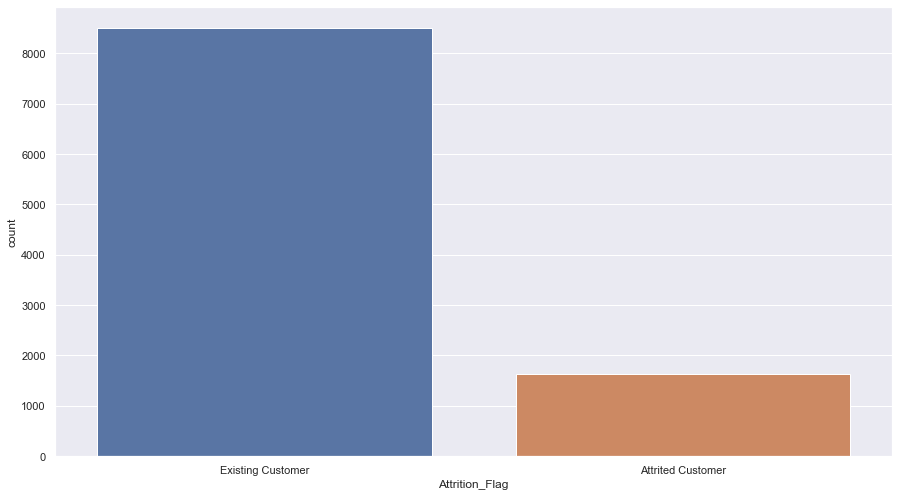

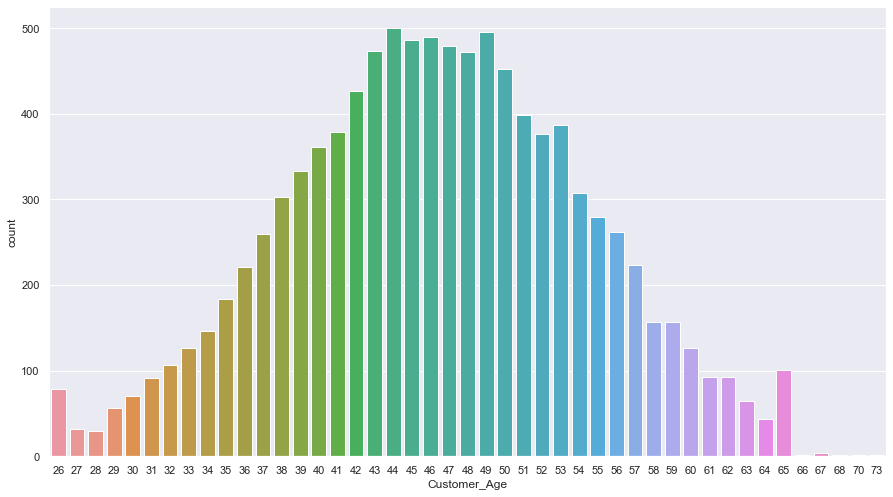

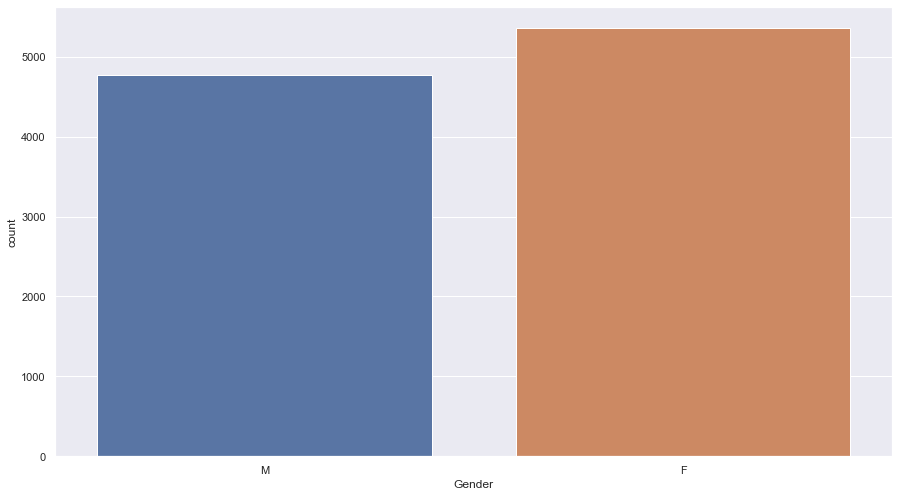

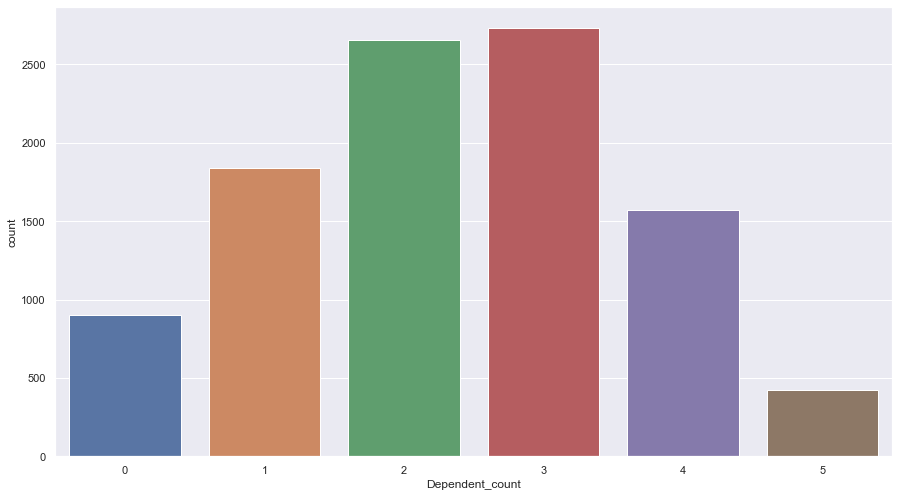

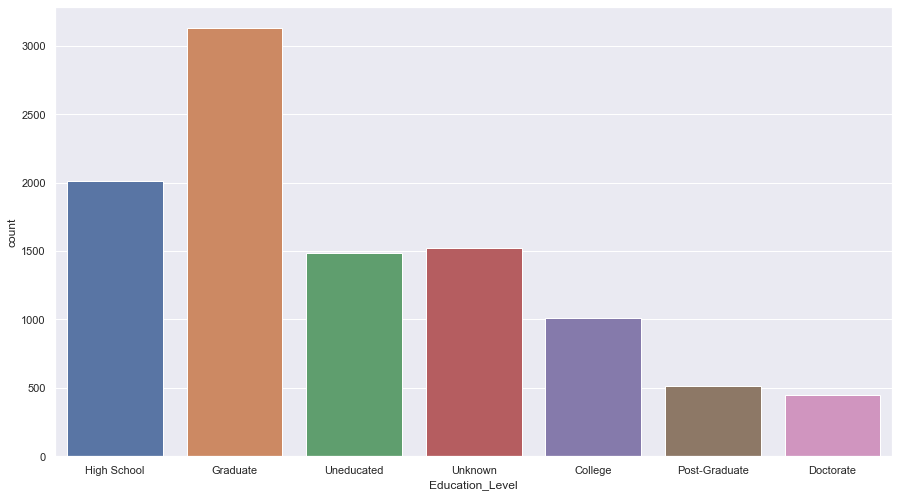

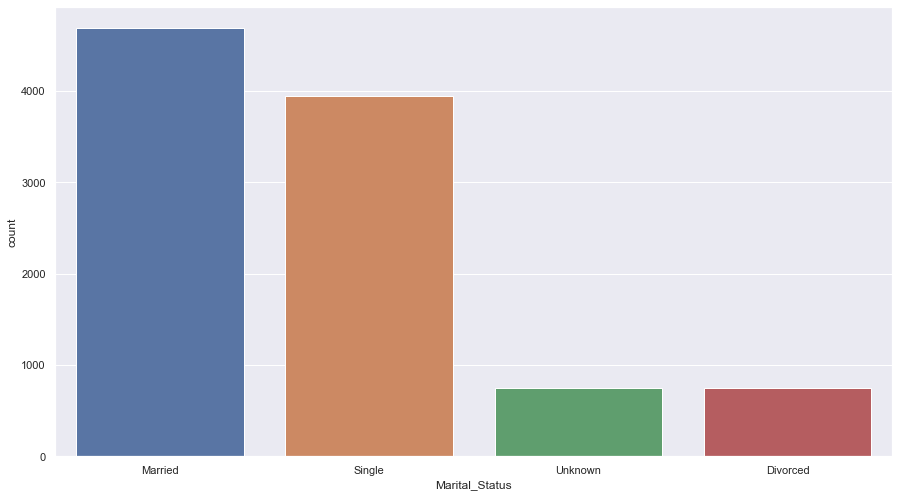

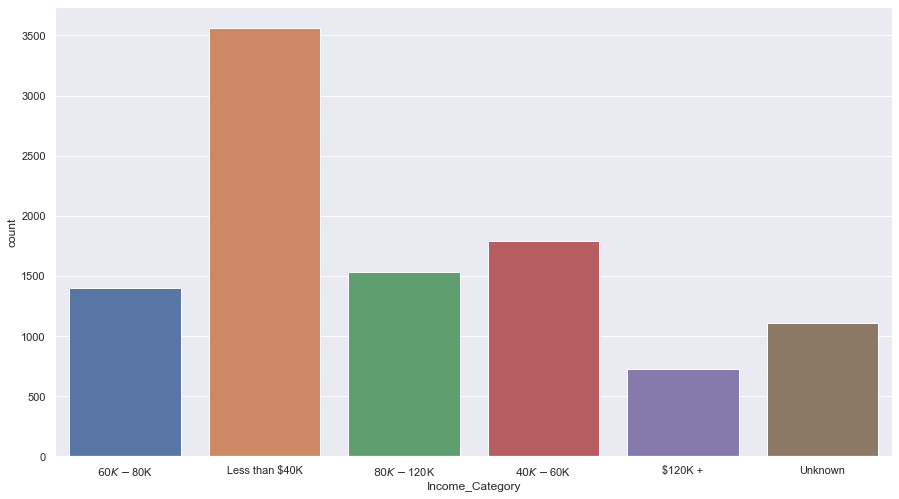

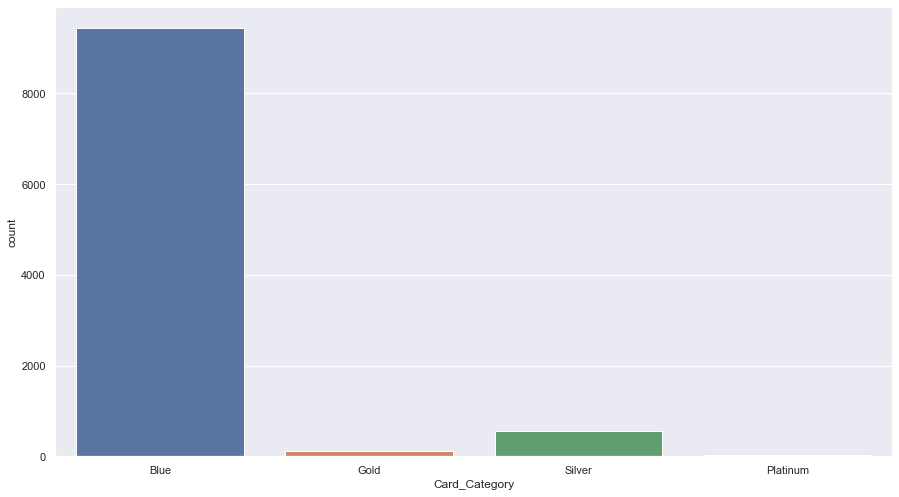

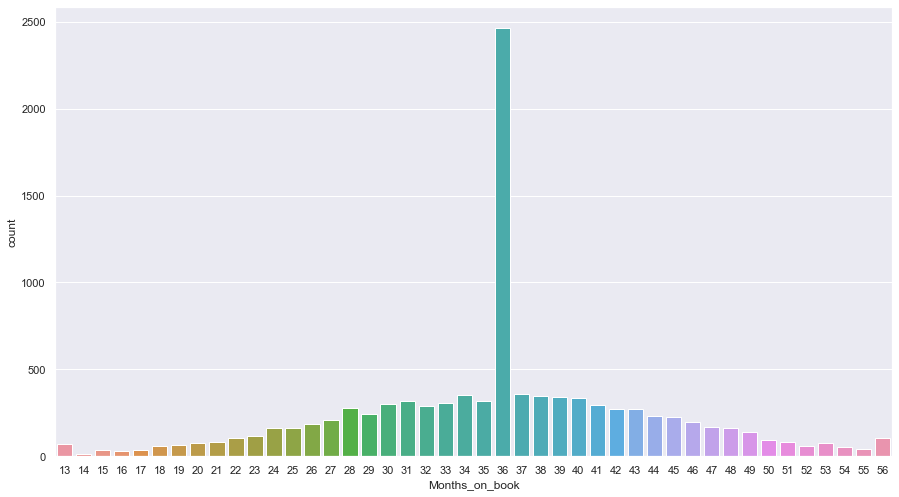

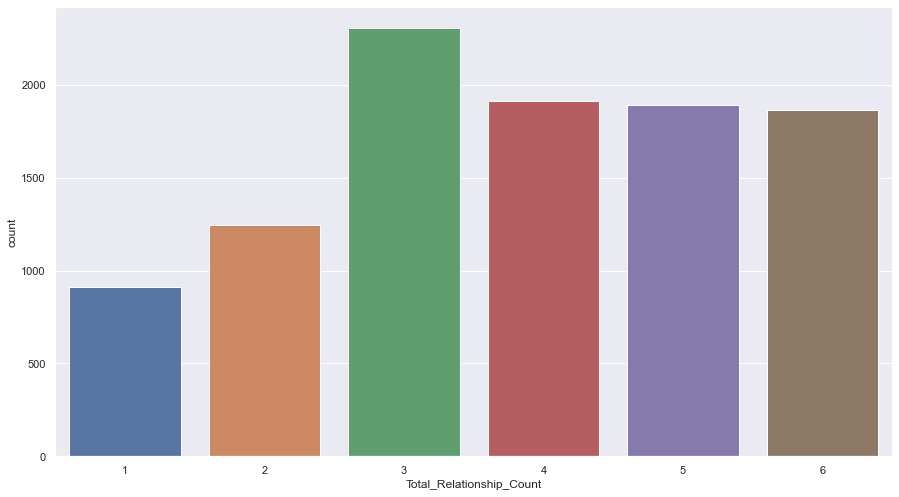

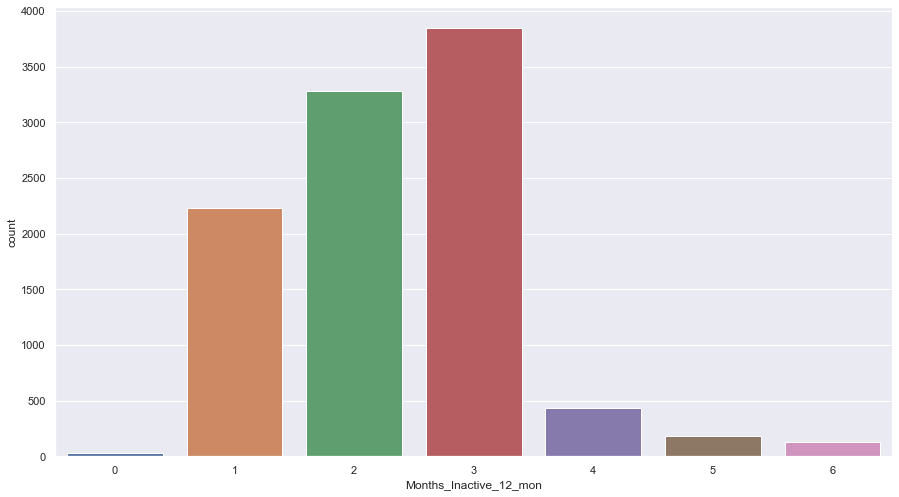

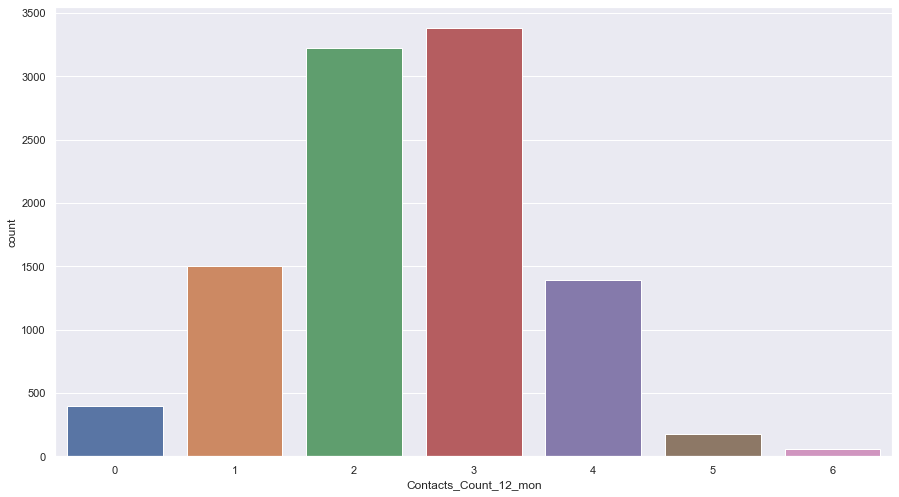

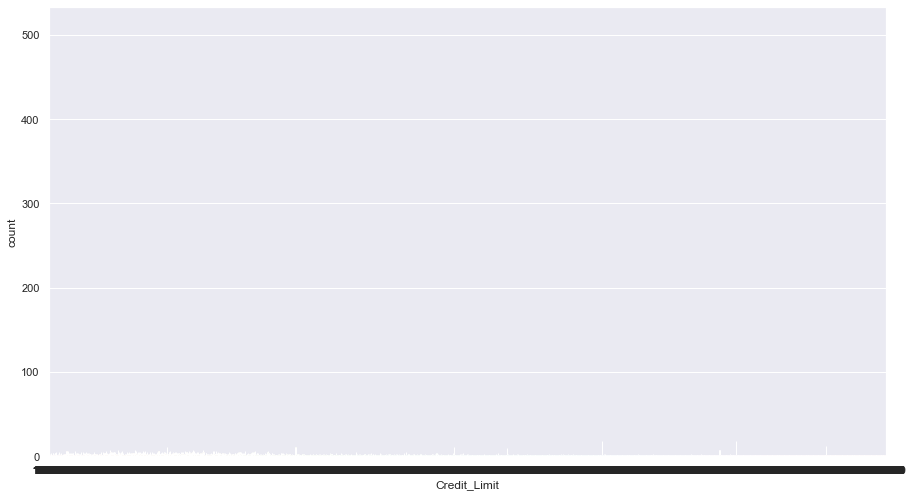

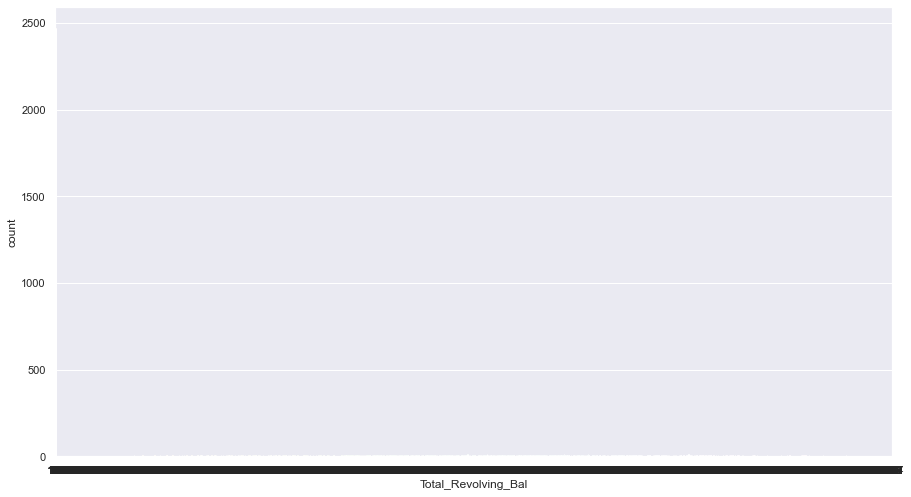

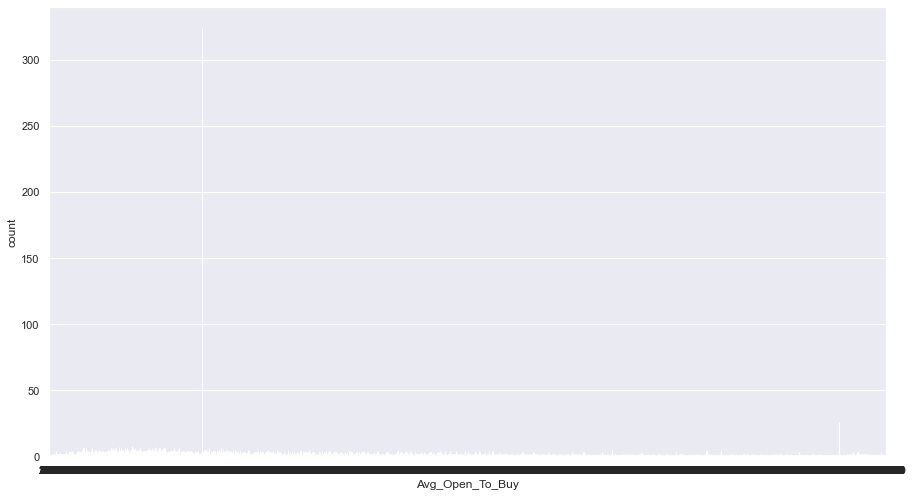

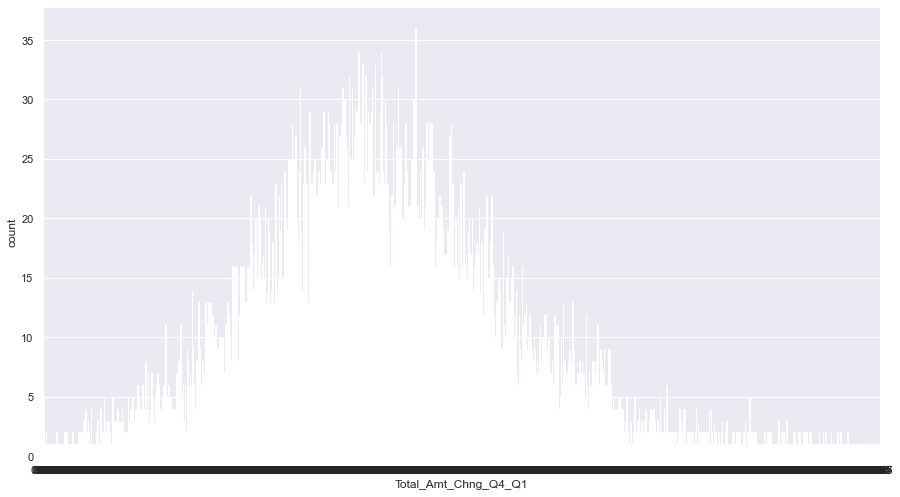

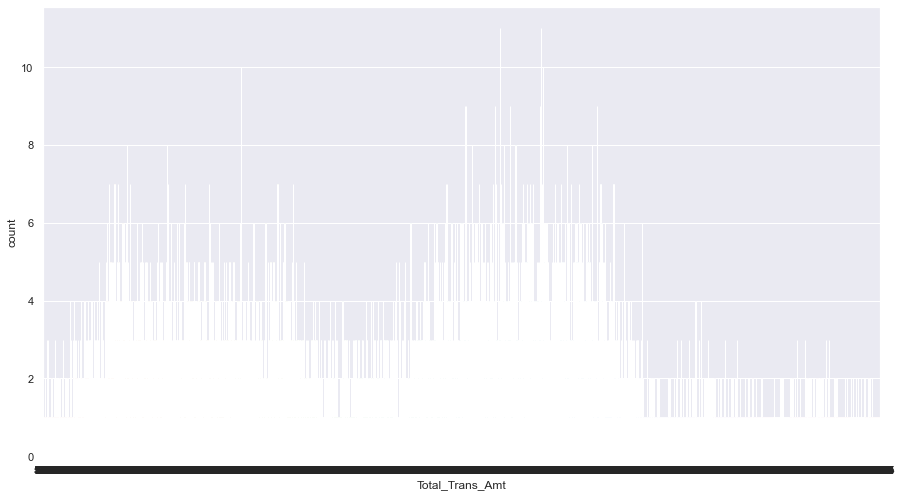

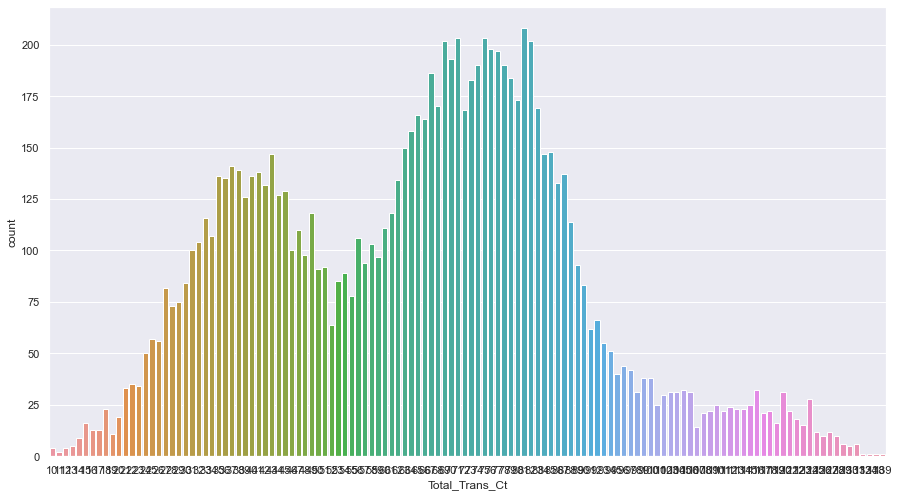

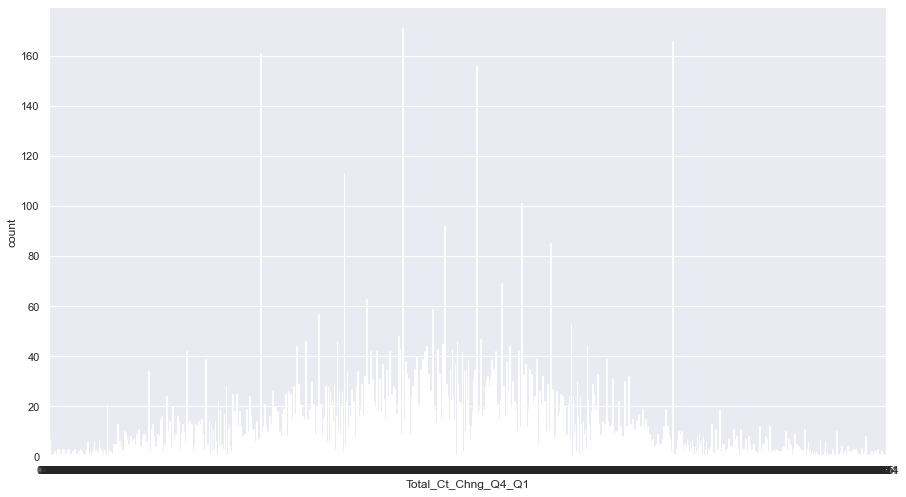

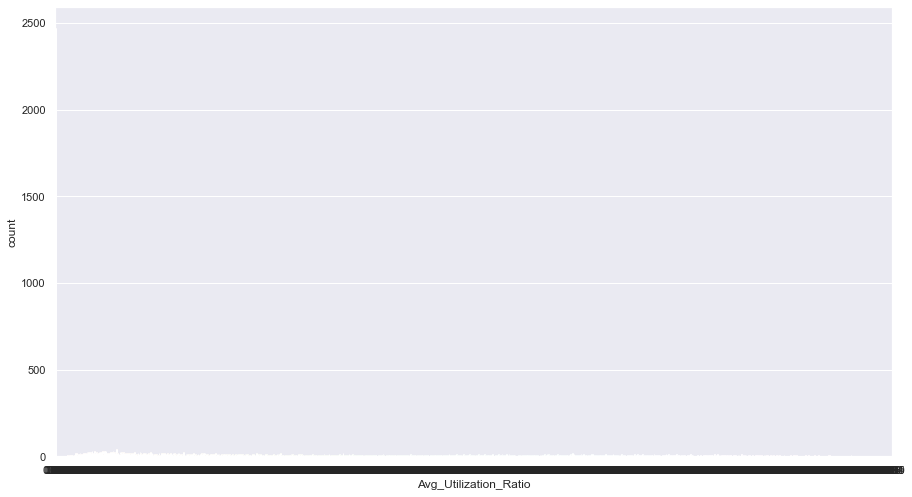

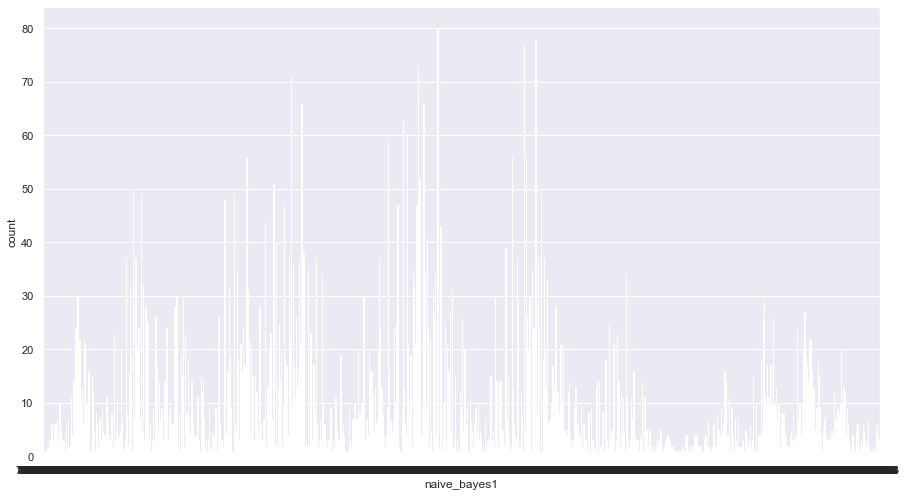

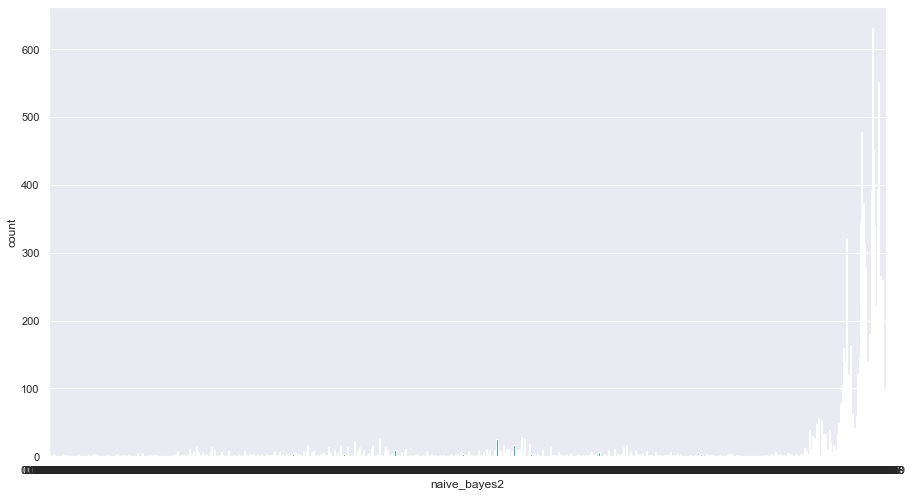

In [4]:
for fig, col in enumerate(df.columns):
    plt.figure(fig)
    sns.countplot(x=col, data=df)

We change the `Attrition_Flag` column data to numerical by setting `Existing Custmer` to value `0` and `Attrited Customer` to value `1` and we change the type of the values in the column to `int`. 

In [5]:
df["Attrition_Flag"].replace(["Existing Customer", "Attrited Customer"], [0,1], inplace=True)


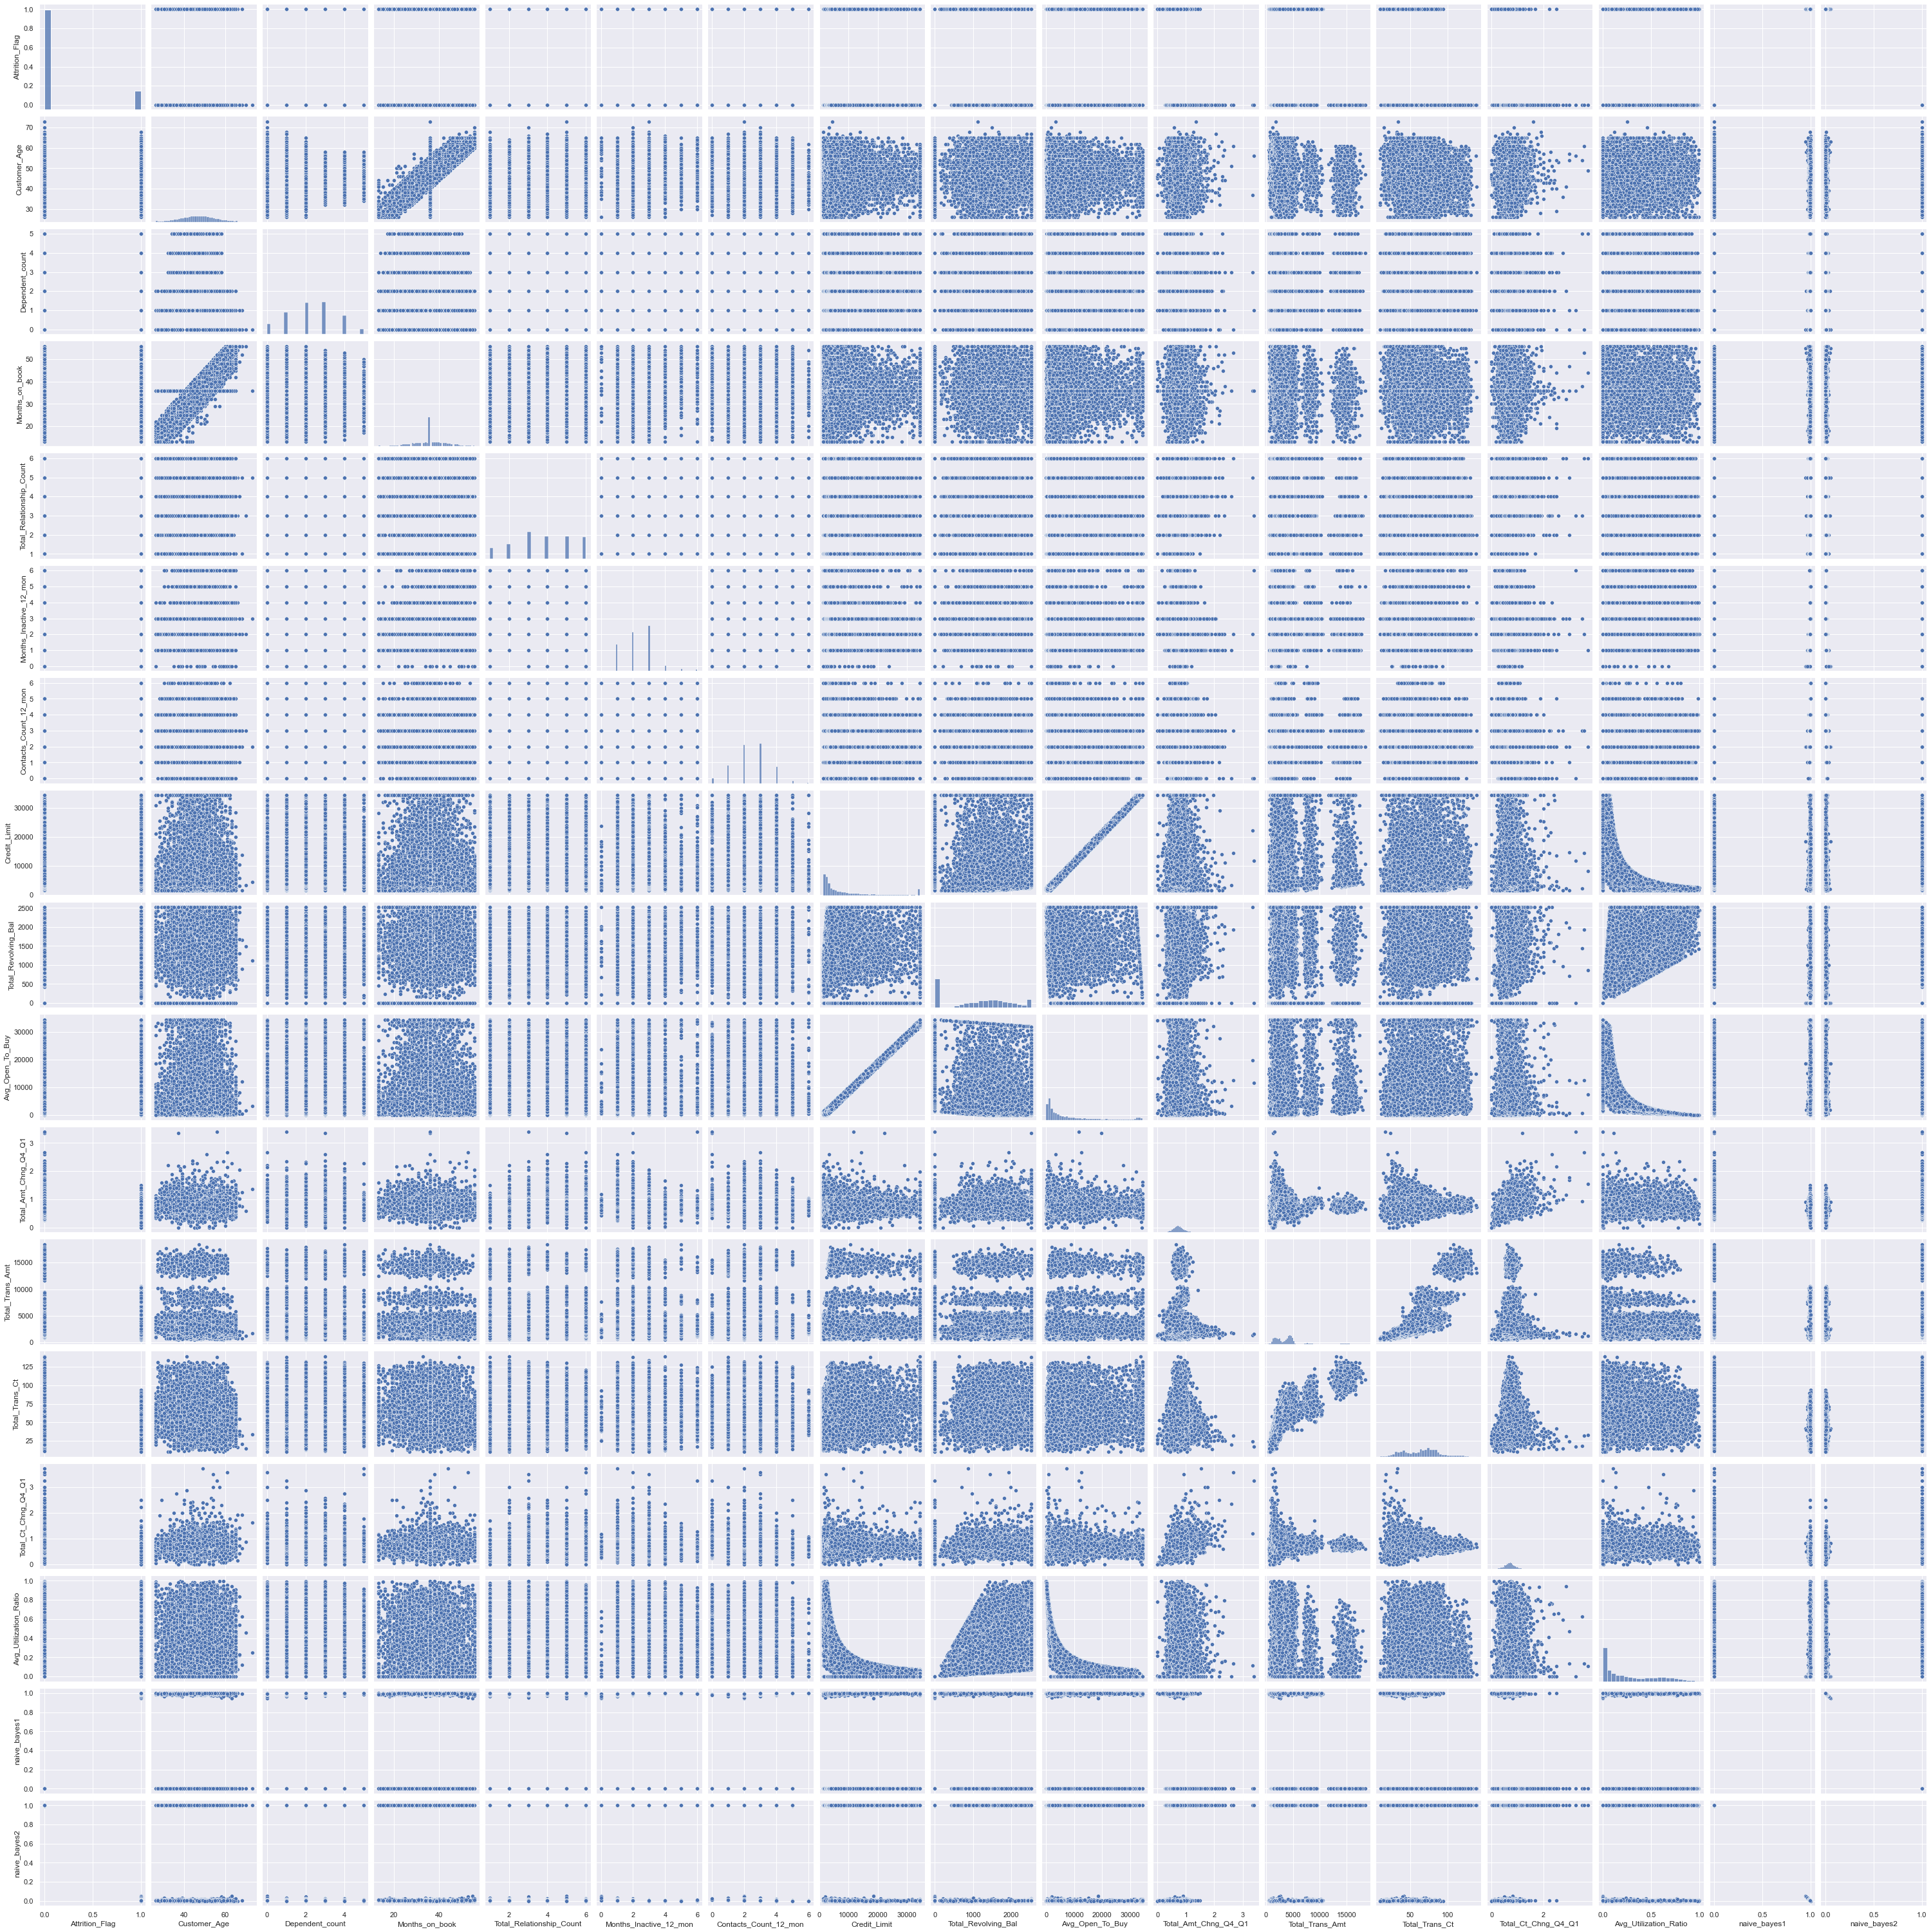

In [6]:
sns.pairplot(df)
plt.show()

Below we display the Pearson correlatino matrix with the numerical data using a heatmap.

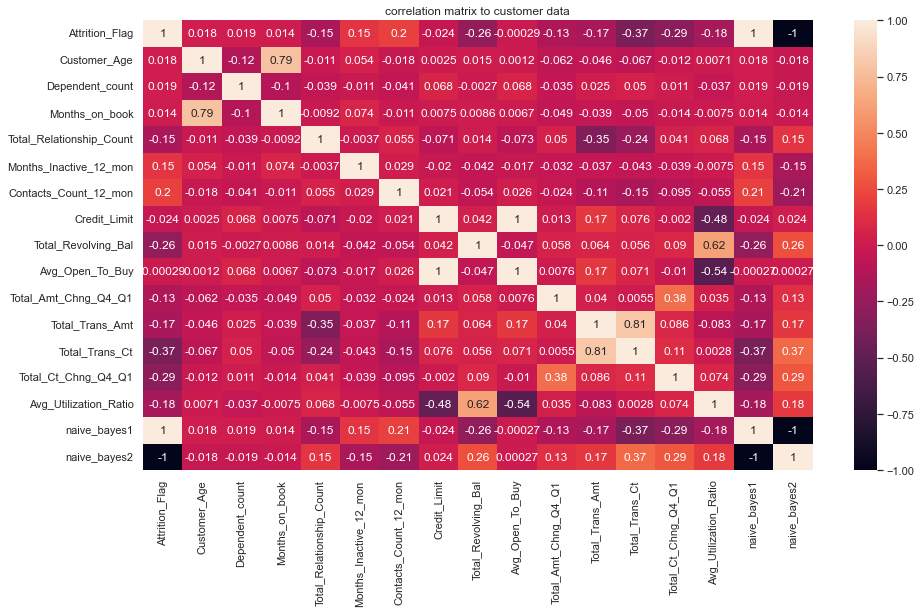

In [7]:
sns.heatmap(df.corr(), annot=True)
plt.title("correlation matrix to customer data")
plt.show()

We notice that `Avg_Open_To_Buy` column has very small correlation to the `Attrition_Flag` thus we drop it from the dataset.

Note, we later tested our models with and without this column and they generally performed better without it.

In [8]:
df.drop("Avg_Open_To_Buy", axis=1, inplace=True)

In [9]:
for col in df.columns:
    print(col,"\t\t\t", type(df[col][0]))

Attrition_Flag 			 <class 'numpy.int64'>
Customer_Age 			 <class 'numpy.int64'>
Gender 			 <class 'str'>
Dependent_count 			 <class 'numpy.int64'>
Education_Level 			 <class 'str'>
Marital_Status 			 <class 'str'>
Income_Category 			 <class 'str'>
Card_Category 			 <class 'str'>
Months_on_book 			 <class 'numpy.int64'>
Total_Relationship_Count 			 <class 'numpy.int64'>
Months_Inactive_12_mon 			 <class 'numpy.int64'>
Contacts_Count_12_mon 			 <class 'numpy.int64'>
Credit_Limit 			 <class 'numpy.float64'>
Total_Revolving_Bal 			 <class 'numpy.int64'>
Total_Amt_Chng_Q4_Q1 			 <class 'numpy.float64'>
Total_Trans_Amt 			 <class 'numpy.int64'>
Total_Trans_Ct 			 <class 'numpy.int64'>
Total_Ct_Chng_Q4_Q1 			 <class 'numpy.float64'>
Avg_Utilization_Ratio 			 <class 'numpy.float64'>
naive_bayes1 			 <class 'numpy.float64'>
naive_bayes2 			 <class 'numpy.float64'>


We want to encode the `Income_Category` column with ordering explicitly definded.

In [10]:
print(np.unique(df["Income_Category"]))
print("number of clients with unknown income category:", sum(df["Income_Category"] == "Unknown"))
print(f"percentage of clients with unknown income category: {sum(df['Income_Category'] == 'Unknown')/df.shape[0]:.3}%")

['$120K +' '$40K - $60K' '$60K - $80K' '$80K - $120K' 'Less than $40K'
 'Unknown']
number of clients with unknown income category: 1112
percentage of clients with unknown income category: 0.11%


We see that some clients' income is `Unknown`. It amounts to about 11% of the number of customers. Since we have a lot of customers, we will drop the ones whose income category is unknown.

In [11]:
unknown_income_index = df[df["Income_Category"] == "Unknown"].index
df.drop(unknown_income_index, inplace=True)

In [12]:
income_categories = np.unique(df["Income_Category"])
income_categories_encoded = [4,1,2,3,0]
df["Income_Category"].replace(income_categories, income_categories_encoded, inplace=True)

Now, we will encode the `Gender` column data.

In [13]:
np.unique(df["Gender"])

array(['F', 'M'], dtype=object)

In [14]:
gender_label_encoder = LabelEncoder()
df["Gender"] = gender_label_encoder.fit_transform(df["Gender"])

Now, we will encode the `Educational_Level` column data

In [15]:
education_level_categories = np.unique(df["Education_Level"])
print(education_level_categories)

['College' 'Doctorate' 'Graduate' 'High School' 'Post-Graduate'
 'Uneducated' 'Unknown']


In [16]:
education_level_categories_encoded =[2,5,3,1,4,0,2.5] # We set "unknown" values to the average of the rest
df["Education_Level"].replace(education_level_categories, education_level_categories_encoded, inplace=True)

Now, we will encode the `Card_Category` column

In [17]:
card_categories = np.unique(df["Card_Category"])
card_categories

array(['Blue', 'Gold', 'Platinum', 'Silver'], dtype=object)

In [18]:
card_categories_encoded = [0,2,3,1]
df["Card_Category"].replace(card_categories, card_categories_encoded, inplace=True)


Now, we will encode `Marital_Status` column data.

In [19]:
np.unique(df["Marital_Status"])

array(['Divorced', 'Married', 'Single', 'Unknown'], dtype=object)

In [20]:
marital_status_encoder = make_column_transformer((OneHotEncoder(drop="first"),
                                                  ["Marital_Status"]),
                                                 remainder="passthrough")
df = pd.DataFrame(marital_status_encoder.fit_transform(df),
                  columns= marital_status_encoder.get_feature_names())

Now we will create our `X` and `y` variables

In [21]:
y = df["Attrition_Flag"]
X = []
for col in df.columns:
    if col!= "Attrition_Flag":
        X.append(col)
X = df[X]

Now we will split and scale the data

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=0)
sc = StandardScaler()
X_train = pd.DataFrame(sc.fit_transform(X_train), columns=X.columns)
X_test = pd.DataFrame(sc.transform(X_test), columns=X.columns)


Now we will use `Random Forest Classifier` model with default `criterion="gini` and cross validation with $k=5$ and see the accuracy scores for each *kth* fold as well as the mean of the five scores

In [23]:
rfc_cv_scores = cross_val_score(RandomForestClassifier(), X, y)
rfc_cv_scores

array([1., 1., 1., 1., 1.])

Now we will use a `Random Forest Classifier` with the default $100$ trees and print the prediciton accuracy and then print the confusion matrix

accuracy of predictions on test data: 100.0%


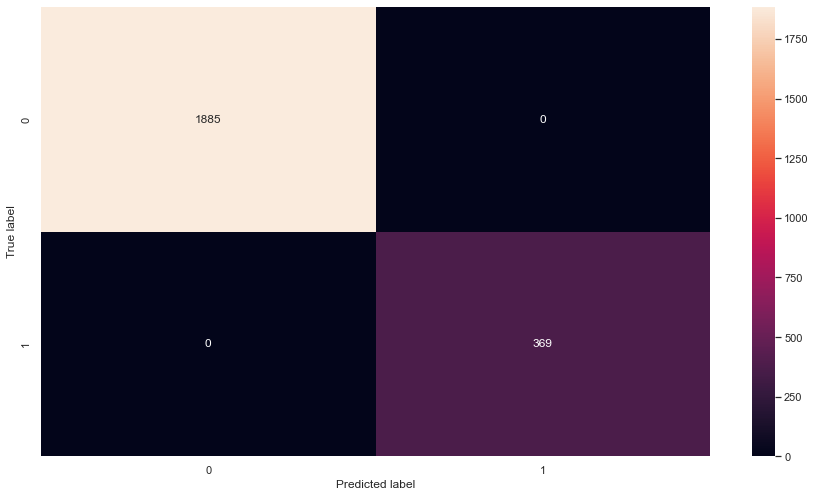

In [24]:
random_forest_clf = RandomForestClassifier()
random_forest_clf.fit(X_train, y_train)
print(f"accuracy of predictions on test data: "
      + f"{random_forest_clf.score(X_test, y_test)*100}%")
confusion_mat = confusion_matrix(y_test, random_forest_clf.predict(X_test))
sns.heatmap(confusion_mat, annot=True, fmt="g")
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.show()

Now we will use `Logistic Regression Classifier` model and cross validation with $k=5$ and observe the accuracy scores for each *kth* fold as well as the mean of the five scores

In [25]:
lr_cv_scores = cross_val_score(LogisticRegression(), X, y)
print(lr_cv_scores)
print(lr_cv_scores.mean())

C:\Users\yousi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\yousi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

[0.91735996 0.90238491 0.95784803 0.96117582 0.89406545]
0.9265668330560178


C:\Users\yousi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Now, we'll use a `Logistic Regression Classifier` and print accuracy score and illustrate the corresponding confusion matrix

accuracy of predictions on test data: 100.0%


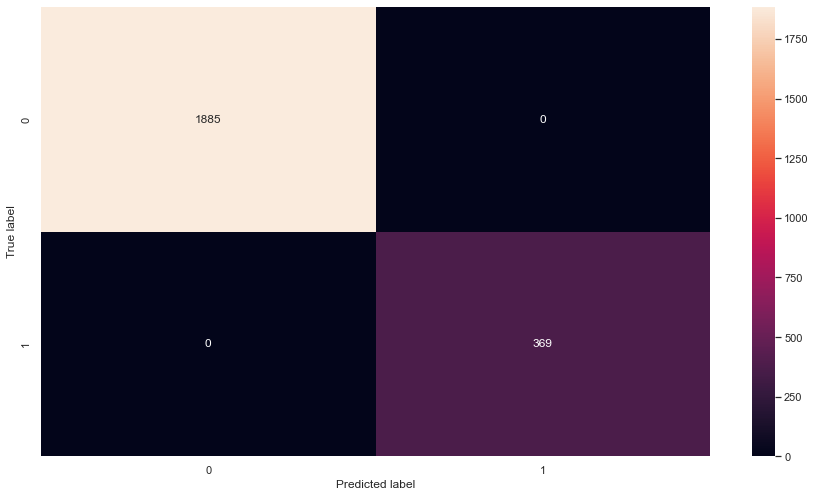

In [26]:
lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train)
print(f"accuracy of predictions on test data: "
      + f"{lr_clf.score(X_test, y_test)*100}%")
confusion_mat = confusion_matrix(y_test, lr_clf.predict(X_test))
sns.heatmap(confusion_mat, annot=True, fmt="g")
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.show()

Now we will use `Support Vector Machine Classifier` model and cross validation with $k=5$ and observe the accuracy scores for each *kth* fold as well as the mean of the five scores

In [27]:
SVC_cv_scores = cross_val_score(SVC(), X, y)
print(SVC_cv_scores)
print(SVC_cv_scores.mean())

[0.84414864 0.84026622 0.84026622 0.84026622 0.84026622]
0.8410427066001109


Now, we'll use a `Support Vector Machine Classifier` with the default kernel `rbf` (radial basis function) and print the accuracy score and illustrate the corresponding confusion matrix

accuracy of predictions on test data: 100.0%


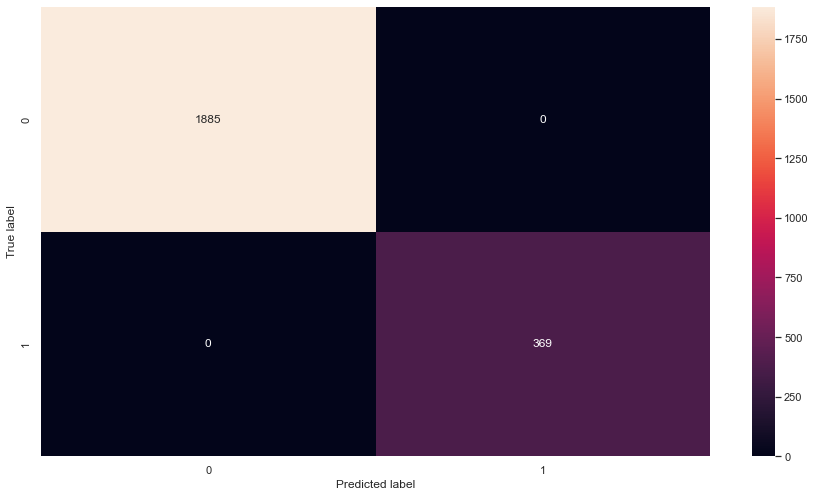

In [28]:
SVC_classifier = SVC()
SVC_classifier.fit(X_train, y_train)
print(f"accuracy of predictions on test data: "
      + f"{SVC_classifier.score(X_test, y_test)*100}%")
confusion_mat = confusion_matrix(y_test, SVC_classifier.predict(X_test))
sns.heatmap(confusion_mat, annot=True, fmt="g")
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.show()

In [29]:
importances = random_forest_clf.feature_importances_
features_importances = []
for i in range(len(X.columns)):
    features_importances.append((X.columns[i], importances[i]))

features_importances.sort(key=lambda x: x[1])
features_importances

[('onehotencoder__x0_Unknown', 5.770609574845506e-05),
 ('onehotencoder__x0_Married', 0.00012994445738459586),
 ('Card_Category', 0.00023036718771600977),
 ('Education_Level', 0.0003968282999121467),
 ('onehotencoder__x0_Single', 0.0004543407942719966),
 ('Dependent_count', 0.0004897053033760099),
 ('Gender', 0.0005355801365076985),
 ('Income_Category', 0.0005793770746699965),
 ('Months_on_book', 0.0010696673976511523),
 ('Customer_Age', 0.0020775451776202125),
 ('Months_Inactive_12_mon', 0.0026459363198751713),
 ('Credit_Limit', 0.0027891438380875993),
 ('Contacts_Count_12_mon', 0.0030056513336203126),
 ('Total_Amt_Chng_Q4_Q1', 0.008206176986032977),
 ('Total_Relationship_Count', 0.012361941147970176),
 ('Avg_Utilization_Ratio', 0.014672029358213158),
 ('Total_Trans_Amt', 0.032560770961241645),
 ('Total_Revolving_Bal', 0.03310634233974571),
 ('Total_Ct_Chng_Q4_Q1', 0.034412341535303925),
 ('Total_Trans_Ct', 0.05276866767274287),
 ('naive_bayes1', 0.3383991918560747),
 ('naive_bayes2',

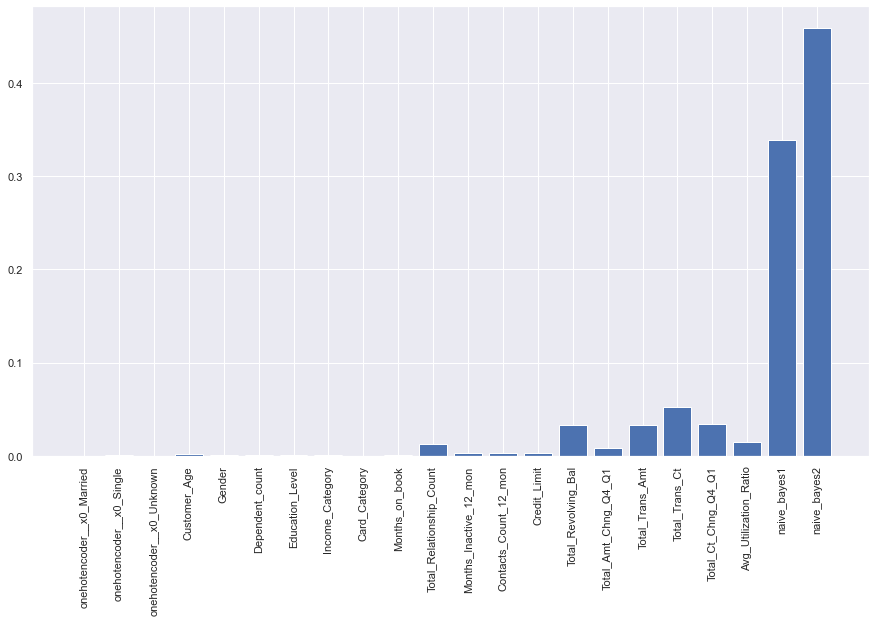

In [30]:
plt.bar(X.columns, importances)
plt.xticks(rotation="vertical")
plt.show()

In [31]:
print("correlation between attrition_flag and card_category:",
      round(df["Attrition_Flag"].corr(df["Card_Category"]),4))

correlation between attrition_flag and card_category: 0.0004


accuracy of predictions on test data: 100.0%


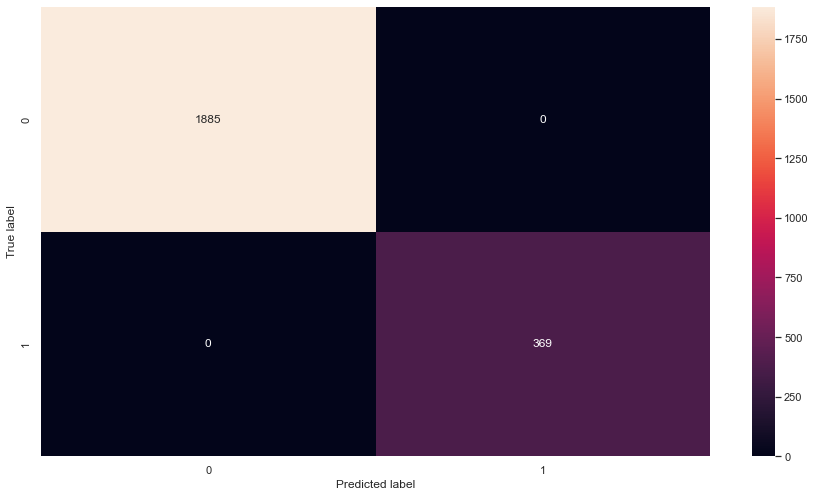

In [32]:
random_forest_clf = RandomForestClassifier()
X_train1 = X_train.drop("Card_Category", axis=1)
X_test1 = X_test.drop("Card_Category", axis=1)
random_forest_clf.fit(X_train1, y_train)
print(f"accuracy of predictions on test data: "
      + f"{random_forest_clf.score(X_test1, y_test)*100}%")
confusion_mat = confusion_matrix(y_test, random_forest_clf.predict(X_test1))
sns.heatmap(confusion_mat, annot=True, fmt="g")
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.show()

### Summary:-
We have a dataset from a certain bank that shows data about its customers i.e., card holders.  

The goal is to develop a model to recognize which customer will churn or become attrited, in other words, leave the bank.  

We imported the data, cleaned it, examined it, and dropped `AvgOpenTo_Buy` column as it had very low correlation with `Attrition_Flag`.  

We examined the affect of dropping the aforementioned column on the models and found that it has a positive effect.  

We noticed that we have some customers with unknown income in the `Income_Category` column, we dropped those customers from the data.

We trained `random forest`, `logistic regression`, and `SVM` with rbf kernel classifiers on the data to see which performs better in predicting those customers that are attrited (or those are likely to churn).  

We found out that each of them performed flawlessly with a coveted 100% prediction accuracy.  

Then we ranked the importance of the features to the random forest model in order to see which columns we can cut without reducing the performance of the model.  

Accordingly, we thus dropped `Card_Category` column from the data and found that it has no negative effect on the accuracy of the model.

<br><br><br><br><br><br>

**Note:** we weren't sure whether to include or remove the naive_bayes classifier columns that the dataset included so we left them in. We will now take them out to see how good the models perform without them.

In [33]:
X_train2 = X_train1.drop(["naive_bayes1", "naive_bayes2"], axis=1)
X_test2 = X_test1.drop(["naive_bayes1", "naive_bayes2"], axis=1)

accuracy of predictions on test data: 95.91836734693877%


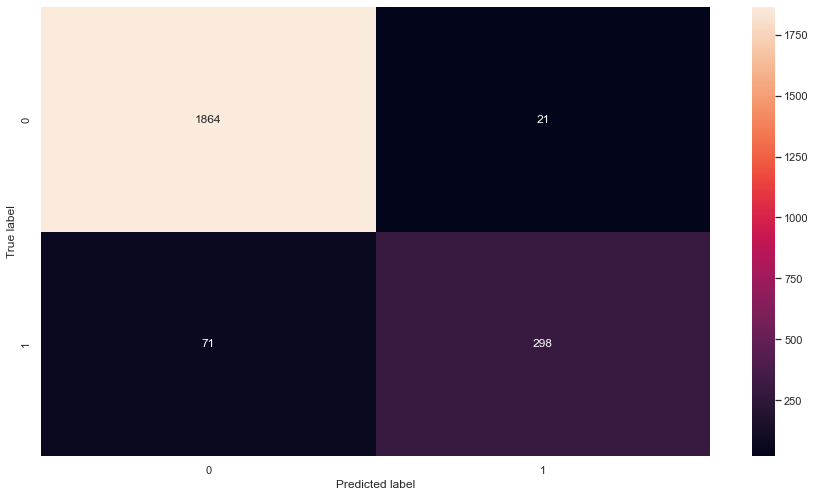

In [34]:
random_forest_clf = RandomForestClassifier()
random_forest_clf.fit(X_train2, y_train)
print(f"accuracy of predictions on test data: "
      + f"{random_forest_clf.score(X_test2, y_test)*100}%")
confusion_mat = confusion_matrix(y_test,
                                 random_forest_clf.predict(X_test2))
sns.heatmap(confusion_mat, annot=True, fmt="g")
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.show()

accuracy of predictions on test data: 89.84028393966283%


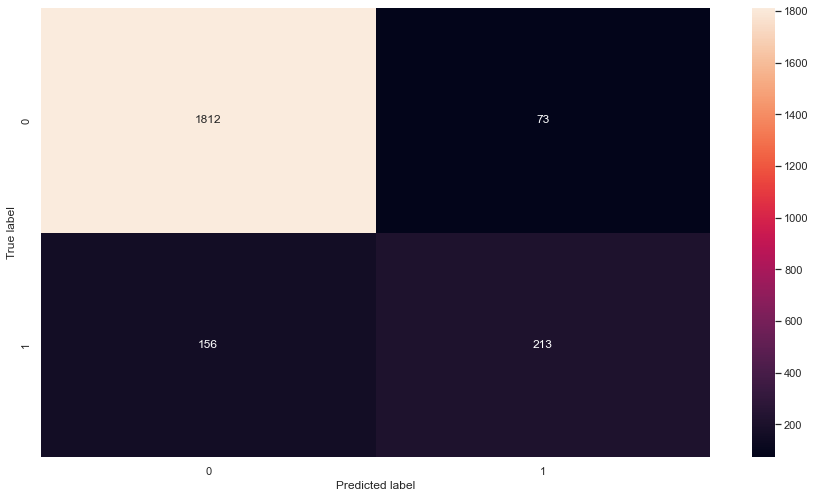

In [35]:
lr_clf = LogisticRegression()
lr_clf.fit(X_train2, y_train)
print(f"accuracy of predictions on test data: "
      + f"{lr_clf.score(X_test2, y_test)*100}%")
confusion_mat = confusion_matrix(y_test, lr_clf.predict(X_test2))
sns.heatmap(confusion_mat, annot=True, fmt="g")
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.show()

accuracy of predictions on test data: 92.90150842945873%


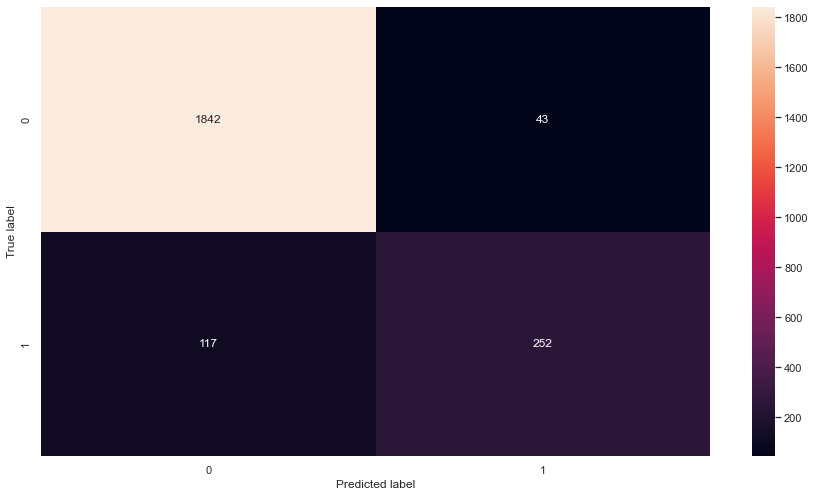

In [36]:
SVC_classifier = SVC()
SVC_classifier.fit(X_train2, y_train)
print(f"accuracy of predictions on test data: "
      + f"{SVC_classifier.score(X_test2, y_test)*100}%")
confusion_mat = confusion_matrix(y_test, SVC_classifier.predict(X_test2))
sns.heatmap(confusion_mat, annot=True, fmt="g")
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.show()